## The data is already preprocessed by compress_output.ipynb

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import xarray as xr

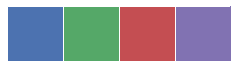

In [2]:
palette = sns.color_palette()[0:4]
sns.palplot(palette)

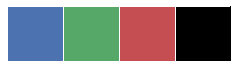

In [3]:
# change the last color to black
palette[3] = (0.0, 0.0, 0.0)
sns.palplot(palette)

## average VMR at every layer

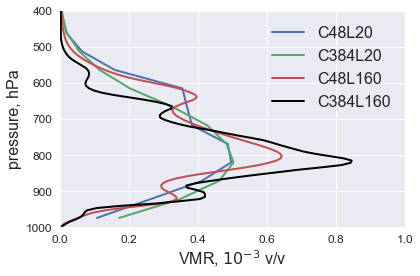

In [4]:
#datadir = "~/FV3/output/processed/vertical_profile/" # Pleiades
datadir = "../small_output/profile/" # local

plt.figure(figsize=[6,4])

#labels = ['C48L20','C48L160','C384L160']
labels = ['C48L20','C384L20','C48L160','C384L160']

for i in range(4):
    color = palette[i]
    label = labels[i]
    dr = xr.open_dataarray(datadir+'plume01_profile_'+label+'.nc',
                               decode_times=False)
    dr *= 1e3 # scale up
    plt.plot(dr.isel(time=-1),dr['pfull'],label=label,color=color,
             alpha=1.0,linewidth=2,linestyle='-')

    plt.xlim(0,1.0);plt.ylim(1000,400)
        
plt.legend(fontsize=16)
plt.ylabel('pressure, hPa',fontsize=16)
plt.xlabel('VMR, $10^{-3}$ v/v',fontsize=16)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)

plt.tight_layout()
#plt.savefig('vertical_profile_3case.png',dpi=200)
plt.savefig('vertical_profile_4case.png',dpi=200)

# maximum VMR at every layer

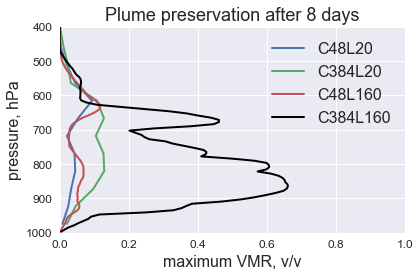

In [6]:
#datadir = "~/FV3/output/processed/vertical_profile/" # Pleiades
datadir = "../small_output/profile/" # local

plt.figure(figsize=[6,4])

#labels = ['C48L20','C48L160','C384L160']
labels = ['C48L20','C384L20','C48L160','C384L160']

for i in range(4):
    color = palette[i]
    label = labels[i]
    dr = xr.open_dataarray(datadir+'plume01_MAXprofile_'+label+'.nc',
                           decode_times=False)
    # dr *= 1e3 # scale up
    plt.plot(dr,dr['pfull'],label=label,color=color,
             alpha=1.0,linewidth=2,linestyle='-')

    plt.xlim(0,1.0);plt.ylim(1000,400)
        
plt.legend(fontsize=16)
plt.ylabel('pressure, hPa',fontsize=16)
plt.xlabel('maximum VMR, v/v',fontsize=16)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.title('Plume preservation after 8 days', fontsize=18)

plt.tight_layout()
plt.savefig('vertical_MAXprofile_4case.png',dpi=200)